# COSC 311 Mid-exam 1

To finish this exam, please download the "housing.csv" dataset from the exam instructions. You will have 60 minutes to finish.

This is a open-book exam. You may use the lecture note, textbook, and online tutorials. However, you are NOT allowed to search any related example code and/or solution from any internet sources.

Note: you need to copy and paste your source code in the Answer Area after each task on MyClasses. In addition, you also need to upload this Jupyter Notebook (".ipynb") file with all source code and test results to the last task of this exam on MyClasses.

I. (10 points)

The Padovan sequence: 1, 1, 1, 2, 2, 3, 4, 5, 7, 9, 12, 16, 21, 28, 37, 49, 65, 86, 114, 151, 200, 265, ...

It is the sequence of integers P(n) defined as:

P(0) = P(1) = P(2) = 1

P(n) = P(n-2) + P(n-3), here n >= 3.

Write a Python program to 1) calculate and output the sum of the first 50 numbers for the Padovan sequence; 2) of the first 50 numbers, calculate and output the sum of all even numbers; 3) of the first 50 numbers, calculate and output the sum of all odd numbers.

In [14]:
oddNums = 0
evenNums = 0
totalNums = 0
prev1 = 1
prev2 = 1
prev3 = 1
current = 1
print("1  1  1  ", end="")
for i in range(3, 51):
    current = prev1 + prev2
    prev1 = prev2
    prev2 = prev3
    prev3 = current
    totalNums += current
    print(current, " ", end="")
    if (current % 2 == 0):
        evenNums += current
    else:
        oddNums += current

print("\nSum of all numbers:", totalNums, "\nSum of odd numbers:", oddNums, "\nSum of even numbers:", evenNums)

1  1  1  2  2  3  4  5  7  9  12  16  21  28  37  49  65  86  114  151  200  265  351  465  616  816  1081  1432  1897  2513  3329  4410  5842  7739  10252  13581  17991  23833  31572  41824  55405  73396  97229  128801  170625  226030  299426  396655  525456  696081  922111  
Sum of all numbers: 3761835 
Sum of odd numbers: 2540299 
Sum of even numbers: 1221536


II. Please use the "Housing Dataset" attached to finish the following tasks. For each task, please copy and paste your source code in the Answer Area after each task. At the same time, please upload your Jupyter Notebook (".ipynb") file with all source code and test results at the last task of this exam.

1. (10 points) Use Pandas package to:

1) use info() function to show the column information of this dataset

2) show the statistics (count, mean, std, min, ...) of numeric columns in this dataset

3) show the unique values of the "housing_median_age" column

4) count how many samples there are in this dataset


In [15]:
import pandas as pd

housing_data = pd.read_csv('housing.csv')

print(housing_data.info(), "\n")
print(housing_data.describe(), "\n")
print(housing_data['housing_median_age'].unique(), "\n")
print(housing_data.count(), "\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None 

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.1359

2. (10 points) Draw a scatterplot figure to show the relationship between "total_bedrooms" and "households"

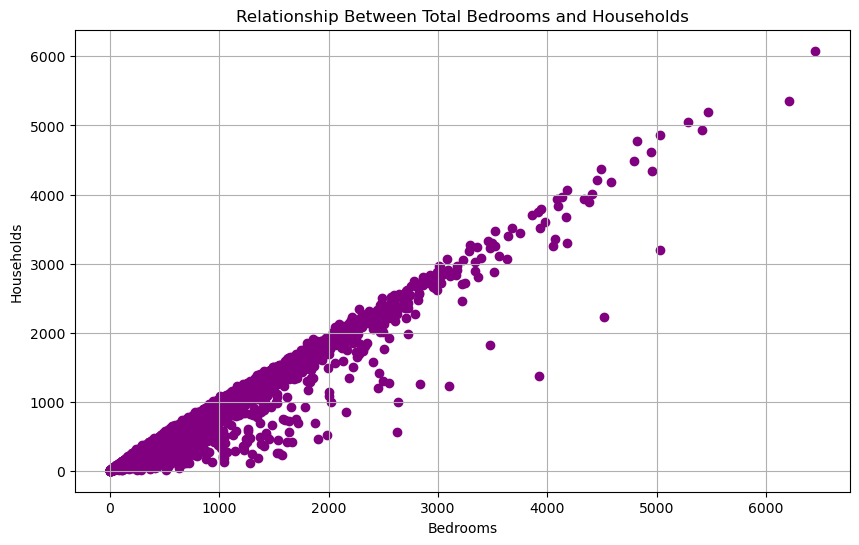

In [16]:
import matplotlib.pyplot as plt

bedrooms = housing_data['total_bedrooms']
households = housing_data['households']

plt.figure(figsize=(10, 6)) 
plt.scatter(bedrooms, households, color='purple')
plt.title('Relationship Between Total Bedrooms and Households')
plt.xlabel('Bedrooms')
plt.ylabel('Households')
plt.grid(True) 
plt.show()

3. (10 points) Draw a bar figure to show the average "median_house_value" for each type of "ocean_proximity" (i.e. for 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', and 'ISLAND', respectively)

['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND'] 



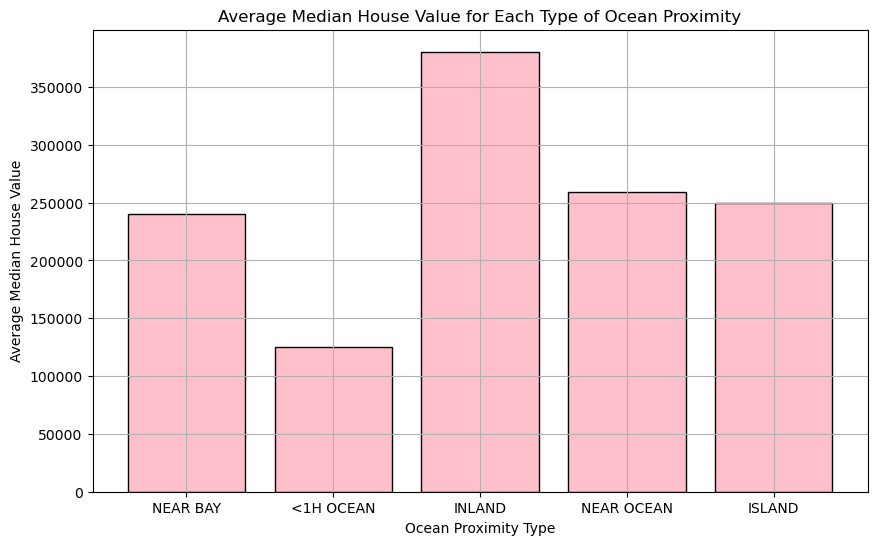

In [17]:
print(housing_data['ocean_proximity'].unique(), "\n")
proximity_types = ['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND']
avg_med_house_value = housing_data.groupby('ocean_proximity')['median_house_value'].mean()

plt.figure(figsize=(10, 6))
plt.bar(proximity_types, avg_med_house_value, color='pink', edgecolor='black')
plt.title('Average Median House Value for Each Type of Ocean Proximity')
plt.xlabel('Ocean Proximity Type')
plt.ylabel('Average Median House Value')
plt.grid(True)
plt.show()

4. (10 points) Draw a histogram to show the "housing_median_age" distribution in 5 bins for the "<1H OCEAN" houses

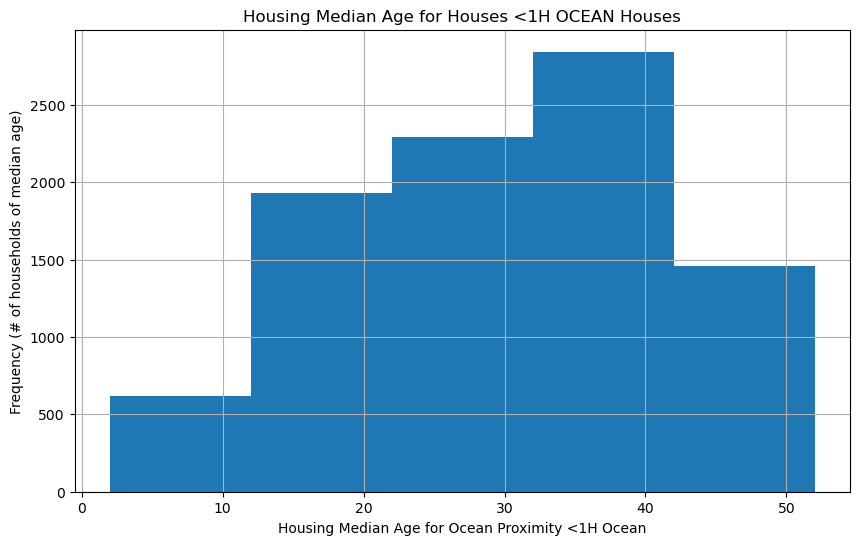

In [20]:
hist_data = housing_data['housing_median_age'][housing_data['ocean_proximity'] == '<1H OCEAN']

plt.figure(figsize=(10, 6))
plt.hist(hist_data, bins=5)
plt.xlabel('Housing Median Age for Ocean Proximity <1H Ocean')
plt.ylabel('Frequency (# of households of median age)')
plt.title("Housing Median Age for Houses <1H OCEAN Houses")
plt.grid(True)
plt.show()